# R vs Python for Data Analytics: A Comparative Walkthrough
## Author: Ebuwa Evbuoma-Fike, Senior Data Scientist in Healthcare
## Last Edited: 1/12/25
## Workshop Date: 2/8/25

## Material for R vs Python Workshop

### Optional Pre-Workshop Setup: Python Environment for Data Analysis

This is an optional pre-workshop setup guide to help you set up and get familiar with the Python environment we'll be using during the workshop.

**Installation**

1. Install Anaconda/Miniconda:

Conda is a popular, free tool for setting up and managing Python environments.

Download and install Anaconda or Miniconda from the official website: https://www.anaconda.com/. Choose the version appropriate for your operating system (Windows, macOS, Linux).
Note: Miniconda is a smaller, more lightweight version of Anaconda. It may have limitations.

2. Install VS Code:

VS Code a popular, free IDE. You are welcome to use another IDE of choice. I will be using VS Code during the workshop.

Download and install VS Code from the official website: https://code.visualstudio.com/).

3. Create a Conda Environment:

Open your terminal/command prompt.
Create a new conda environment named 'rpy2_env' using the provided .yml file.

**Setup**

4. Create a working directory by either:

Setting up a specific, named folder for this workshop, or,

Saving the downloaded workshop folder from your inbox (`r_vs_python_for_rladiesstl`) as is, to a specific location. Remember it.

5. Launch VS Code

Click "Open Folder" (image below). Choose the folder designated for this workshop in Step #4.

![AddFolders](adding_folders_vs_code.png)


6. Set up your Python environment

In your terminal in VS Code (see https://code.visualstudio.com/docs/terminal/basics), run the following (sans ``):

`conda env create -f rpy2_env.yml`

The first line of the yml file sets the new environment's name. It ensures that the packages, versions and dependencies are set up precisely. Sometimes, one package needs an upgraded or downgraded version of another to run - this environment has them playing nicely. 

Next, to activate the conda environment, run the following (sans ``):

`conda activate rpy2_env`

More conda documentation and commands: https://docs.conda.io/projects/conda/en/latest/commands/index.html

7. Check your setup

You should see, to the far left of the command line prompt in your terminal window `(rpy2_env)`

To check your working directory, run the following (sans ``):

`pwd`

The printed path should match that of your folder from Step #4.

To verify that the environment you have matches the provided enviroment, run the following:

`conda list`

The list of packages should match the content of the yml file (double-click on `rpy2_env.yml` and it will pop up in a new tab, adjacent to this notebook.)

### R vs Python for Data Analytics: A Comparative Walkthrough Technical Workshop

There are essentially two ways to work with R and Python in a Python encironment:
- Work with both languages interchangeably using the rpy2 package.
- Work distinctly in each language, using the r-essentials and rpy2 packages

## A. Flexibly working with both R and Python, interchangeably

#### 1. Import necessary modules:

In [1]:
import rpy2.robjects as robjects 
from rpy2.robjects import pandas2ri 

/Users/ebuwa/opt/anaconda3/envs/rpy2_env/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


#### 2. Convert Python objects to R objects:

- Convert Python lists to R vectors:

In [ ]:
python_list = [1, 2, 3, 4, 5] 
r_vector = robjects.IntVector(python_list) 

- Convert Python dictionaries to R lists:

In [ ]:
python_dict = {'a': 1, 'b': 2, 'c': 3}
r_list = robjects.ListVector(python_dict)

- Convert pandas DataFrames to R data frames:

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'col1': np.array([1, 2, 3]), 'col2': np.array(['a', 'b', 'c'])}) 
r_df = pandas2ri.py2ri(df)

/Users/ebuwa/opt/anaconda3/envs/rpy2_env/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "col1". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/Users/ebuwa/opt/anaconda3/envs/rpy2_env/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "col2". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))


#### 3.  Call R functions:

- Use robjects.r() to execute R code:

In [ ]:
r_result = robjects.r('mean(c(1, 2, 3))') 
print(r_result[0])  # Access the result 

2.0


- Call R functions directly:

In [ ]:
r_mean = robjects.r['mean'] 
r_result = r_mean(r_vector) 
print(r_result[0]) 

3.0


#### 4. Convert R objects back to Python:

- Convert R vectors to Python lists:

In [ ]:
python_list = list(r_vector) 

#### Example

This example demonstrates how to convert a pandas DataFrame to an R data frame and then apply the summary() function from R.

Key Points:

- R Integration: rpy2 allows you to seamlessly integrate R code and Python code within the same environment.

- Data Conversion: The pandas2ri module simplifies data conversion between pandas and R.

- Flexibility: You can call R functions directly or execute R code within Python using rpy2.robjects.r().

In [ ]:
import rpy2.robjects as robjects 
from rpy2.robjects import pandas2ri 

# Create a pandas DataFrame
df = pd.DataFrame({'col1': [1, 2, 3], 'col2': ['a', 'b', 'c']})

# Convert to R DataFrame
r_df = pandas2ri.py2ri(df)

# Apply R's summary function
r_summary = robjects.r['summary'](r_df) 

# Print the R summary
print(r_summary) 

     col1               col2          
 Length:3           Length:3          
 Class :character   Class :character  
 Mode  :character   Mode  :character  



/Users/ebuwa/opt/anaconda3/envs/rpy2_env/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "col1". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))
/Users/ebuwa/opt/anaconda3/envs/rpy2_env/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "col2". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'pandas.core.series.Series'>'
  (name, str(e)))


## B: Working with R and Python distinctly

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Did that run sans errors? Great!

Each time you want to use a variable with R (for example, the dataframe df), you must “send” it to R using the following code:

`%%R -i df `

The alternative (more user-friendly, circumvents common errors) is to use the format below:
`robjects.r('''
    # your R code here. ''')`

### Data Import

1. In Python, load dataset (csv file) and inspect data.
- Refer to the `citibike_trips_schema.xlsx` file for a data dictionary.

In [ ]:
# Load dataset
import pandas as pd
citibike_rides = pd.read_csv("path/to/your/data.csv")

Remove from shareable version

In [30]:
# Load dataset
import pandas as pd
citibike_rides = pd.read_csv("/n_1000_citibike_trips.csv")

In [31]:
# Inspect data
citibike_rides.head(n=5)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan
0,1038,2017-11-13T12:28:13,2017-11-13T12:45:32,3489,Gold St & Frankfort St,40.7107,-74.003541,363,West Thames St,40.708347,-74.017134,30478,Subscriber,1954.0,male,NaN
1,1297,2017-10-14T14:40:04,2017-10-14T15:01:41,3489,Gold St & Frankfort St,40.7107,-74.003541,363,West Thames St,40.708347,-74.017134,31141,Subscriber,1992.0,male,NaN
2,1721,2017-09-17T17:52:03,2017-09-17T18:20:45,3489,Gold St & Frankfort St,40.7107,-74.003541,502,Henry St & Grand St,40.714215,-73.981346,21280,Subscriber,1994.0,female,NaN
3,884,2018-03-19T19:28:37.618000,2018-03-19T19:43:22.108000,3489,Gold St & Frankfort St,40.7107,-74.003541,504,1 Ave & E 16 St,40.732219,-73.981656,26381,Subscriber,1983.0,male,NaN
4,899,2017-12-04T17:01:34,2017-12-04T17:16:33,3489,Gold St & Frankfort St,40.7107,-74.003541,325,E 19 St & 3 Ave,40.736245,-73.984738,27894,Subscriber,1965.0,male,NaN


In [32]:
citibike_rides.info()
citibike_rides.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             1000 non-null   int64  
 1   starttime                1000 non-null   object 
 2   stoptime                 1000 non-null   object 
 3   start_station_id         1000 non-null   int64  
 4   start_station_name       1000 non-null   object 
 5   start_station_latitude   1000 non-null   float64
 6   start_station_longitude  1000 non-null   float64
 7   end_station_id           1000 non-null   int64  
 8   end_station_name         1000 non-null   object 
 9   end_station_latitude     1000 non-null   float64
 10  end_station_longitude    1000 non-null   float64
 11  bikeid                   1000 non-null   int64  
 12  usertype                 1000 non-null   object 
 13  birth_year               912 non-null    float64
 14  gender                   

,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,customer_plan
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,912.000000,0.0
mean,943.893000,3365.668000,40.742726,-73.975099,1540.928000,40.741612,-73.977250,23616.991000,1979.280702,NaN
std,812.448618,139.734038,0.017707,0.015413,1378.698984,0.022210,0.018663,5629.578253,11.832073,NaN
min,64.000000,3122.000000,40.710700,-74.003541,72.000000,40.675147,-74.017134,14536.000000,1921.000000,NaN
25%,446.000000,3265.000000,40.724563,-73.989444,383.000000,40.725213,-73.990149,18424.750000,1971.000000,NaN
50%,747.500000,3459.000000,40.744363,-73.969306,516.000000,40.744363,-73.979779,24867.000000,1982.000000,NaN
75%,1236.000000,3459.000000,40.757632,-73.969306,3127.000000,40.758924,-73.960940,28215.500000,1989.000000,NaN
max,9018.000000,3489.000000,40.757632,-73.955873,3680.000000,40.804213,-73.924615,33473.000000,1999.000000,NaN


**2. In R, load dataset (csv file) and inspect.**
- Head(x, n): Function which returns the first n rows of the dataset.

In [ ]:
robjects.r('''
    # Import the data
    citibike_rides <- read.csv("path/to/yourfile.csv") 

''') 

Remove identifiers from shareable version.

In [33]:
robjects.r('''
    # Import the data
    citibike_rides <- read.csv("/n_1000_citibike_trips.csv") 

''') 

tripduration,starttime,stoptime,...,birth_year,gender,customer_plan
"1,038",2017-...,2017-...,...,"1,954",male,NA
"1,297",2017-...,2017-...,...,"1,992",male,NA
"1,721",2017-...,2017-...,...,"1,994",female,NA
884,2018-...,2018-...,...,"1,983",male,NA
...,...,...,...,...,...,...
723,2017-...,2017-...,...,"1,971",male,NA
599,2018-...,2018-...,...,"1,981",male,NA
"1,537",2018-...,2018-...,...,"1,981",male,NA
"1,304",2017-...,2017-...,...,"1,991",male,NA


If you wanted to truly amalgamate Python and R in one chunk...

- Here we call the R object, the imported dataset, citibike_rides, then, use print(), in Python, to print the dataframe.

In [34]:
# Get the R object (citibike_rides)
r_citibike_rides = robjects.r['citibike_rides'] 

In [35]:

# You can now work with the R DataFrame directly
print(r_citibike_rides) 


     tripduration                  starttime                   stoptime
1            1038        2017-11-13T12:28:13        2017-11-13T12:45:32
2            1297        2017-10-14T14:40:04        2017-10-14T15:01:41
3            1721        2017-09-17T17:52:03        2017-09-17T18:20:45
4             884 2018-03-19T19:28:37.618000 2018-03-19T19:43:22.108000
5             899        2017-12-04T17:01:34        2017-12-04T17:16:33
6             695        2017-10-12T17:29:30        2017-10-12T17:41:06
7            2531 2018-05-25T13:05:32.089000 2018-05-25T13:47:43.492000
8            1672 2018-04-01T11:47:04.021000 2018-04-01T12:14:56.460000
9             605 2018-01-09T09:57:05.847000 2018-01-09T10:07:11.782000
10           3151        2017-10-10T14:05:08        2017-10-10T14:57:40
11            701 2018-05-08T18:42:04.941000 2018-05-08T18:53:46.042000
12           1549        2017-11-20T17:19:39        2017-11-20T17:45:29
13           1398 2018-03-14T17:41:53.495000 2018-03-14T18:05:12

- Next, we print the summary. The advantage? It is legible and well-formatted.

In [36]:
# Or perform R operations on it:
r_summary = robjects.r['summary'](r_citibike_rides) 
print(r_summary)

  tripduration                  starttime                  stoptime  
 Min.   :  64.0   2015-10-07T08:55:34:  1   2015-10-07T09:29:31:  1  
 1st Qu.: 446.0   2015-10-16T10:02:23:  1   2015-10-16T10:09:19:  1  
 Median : 747.5   2015-11-08T12:45:04:  1   2015-11-08T13:08:12:  1  
 Mean   : 943.9   2015-11-15T09:48:15:  1   2015-11-15T10:16:00:  1  
 3rd Qu.:1236.0   2015-11-29T16:22:39:  1   2015-11-29T16:24:32:  1  
 Max.   :9018.0   2015-12-05T18:34:43:  1   2015-12-05T18:36:48:  1  
                  (Other)            :994   (Other)            :994  
 start_station_id              start_station_name start_station_latitude
 Min.   :3122     48 Ave & 5 St         :190      Min.   :40.71         
 1st Qu.:3265     E 2 St & 2 Ave        :173      1st Qu.:40.72         
 Median :3459     E 53 St & 3 Ave       :495      Median :40.74         
 Mean   :3366     Gold St & Frankfort St:142      Mean   :40.74         
 3rd Qu.:3459                                     3rd Qu.:40.76         
 M

I don't recommend you amalgamate R and Python if you're new to all this. Instead, use your docstrings! See below...

In [37]:
robjects.r('''
    print(summary(citibike_rides))
''')


  tripduration   
               starttime  
                stoptime  


 Min.   :  64.0  
 2015-10-07T08:55:34:  1  
 2015-10-07T09:29:31:  1  


 1st Qu.: 446.0  
 2015-10-16T10:02:23:  1  
 2015-10-16T10:09:19:  1  


 Median : 747.5  
 2015-11-08T12:45:04:  1  
 2015-11-08T13:08:12:  1  


 Mean   : 943.9  
 2015-11-15T09:48:15:  1  
 2015-11-15T10:16:00:  1  


 3rd Qu.:1236.0  
 2015-11-29T16:22:39:  1  
 2015-11-29T16:24:32:  1  


 Max.   :9018.0  
 2015-12-05T18:34:43:  1  
 2015-12-05T18:36:48:  1  


                 
 (Other)            :994  
 (Other)            :994  



 start_station_id
              start_station_name
 start_station_latitude


 Min.   :3122    
 48 Ave & 5 St         :190     
 Min.   :40.71         


 1st Qu.:3265    
 E 2 St & 2 Ave        :173     
 1st Qu.:40.72         


 Median :3459    
 E 53 St & 3 Ave       :495     
 Median :40.74         


 Mean   :3366    
 Gold St & Frankfort St:142     
 Mean   :40.74         


 3rd Qu.:3459    
   

'Min. :...,'1st Qu.:...,'Median :...,'Mean :...,...,NA_character_,NA_character_,NA_character_,NA_character_


In [38]:
robjects.r('''
    # Inspect the data
    head(citibike_rides, n= 5)
''') 

tripduration,starttime,stoptime,...,birth_year,gender,customer_plan
"1,038",2017-11...,2017-11...,...,"1,954",male,NA
"1,297",2017-10...,2017-10...,...,"1,992",male,NA
"1,721",2017-09...,2017-09...,...,"1,994",female,NA
884,2018-03...,2018-03...,...,"1,983",male,NA
899,2017-12...,2017-12...,...,"1,965",male,NA


### Data Manipulation

**1. In Python, select specific columns and filter the dataset.**

We are looking for all ride encounters with riders born after the year 1980.

In [39]:
# Subset columns as in selected_columns below
selected_columns = ["tripduration", "starttime", "stoptime", "start_station_name", "end_station_name", "bikeid", "usertype", "birth_year", "gender"]
citibike_rides_subset = citibike_rides[selected_columns]
citibike_rides_subset.head(n=10)  # Display the new subset

,tripduration,starttime,stoptime,start_station_name,end_station_name,bikeid,usertype,birth_year,gender
0,1038,2017-11-13T12:28:13,2017-11-13T12:45:32,Gold St & Frankfort St,West Thames St,30478,Subscriber,1954.0,male
1,1297,2017-10-14T14:40:04,2017-10-14T15:01:41,Gold St & Frankfort St,West Thames St,31141,Subscriber,1992.0,male
2,1721,2017-09-17T17:52:03,2017-09-17T18:20:45,Gold St & Frankfort St,Henry St & Grand St,21280,Subscriber,1994.0,female
3,884,2018-03-19T19:28:37.618000,2018-03-19T19:43:22.108000,Gold St & Frankfort St,1 Ave & E 16 St,26381,Subscriber,1983.0,male
4,899,2017-12-04T17:01:34,2017-12-04T17:16:33,Gold St & Frankfort St,E 19 St & 3 Ave,27894,Subscriber,1965.0,male
5,695,2017-10-12T17:29:30,2017-10-12T17:41:06,Gold St & Frankfort St,Forsyth St & Broome St,32173,Subscriber,1983.0,male
6,2531,2018-05-25T13:05:32.089000,2018-05-25T13:47:43.492000,Gold St & Frankfort St,Jay St & Tech Pl,27747,Customer,1969.0,unknown
7,1672,2018-04-01T11:47:04.021000,2018-04-01T12:14:56.460000,Gold St & Frankfort St,Jay St & Tech Pl,31571,Customer,1983.0,male
8,605,2018-01-09T09:57:05.847000,2018-01-09T10:07:11.782000,Gold St & Frankfort St,South End Ave & Liberty St,32595,Subscriber,1965.0,female
9,3151,2017-10-10T14:05:08,2017-10-10T14:57:40,Gold St & Frankfort St,Fulton St & Broadway,19155,Subscriber,1949.0,male


In [40]:
# Filter the citibike_rides_subset dataframe to rides with riders born after the year 1980
citibike_rides_subset[citibike_rides_subset["birth_year"] > 1980]

,tripduration,starttime,stoptime,start_station_name,end_station_name,bikeid,usertype,birth_year,gender
1,1297,2017-10-14T14:40:04,2017-10-14T15:01:41,Gold St & Frankfort St,West Thames St,31141,Subscriber,1992.0,male
2,1721,2017-09-17T17:52:03,2017-09-17T18:20:45,Gold St & Frankfort St,Henry St & Grand St,21280,Subscriber,1994.0,female
3,884,2018-03-19T19:28:37.618000,2018-03-19T19:43:22.108000,Gold St & Frankfort St,1 Ave & E 16 St,26381,Subscriber,1983.0,male
5,695,2017-10-12T17:29:30,2017-10-12T17:41:06,Gold St & Frankfort St,Forsyth St & Broome St,32173,Subscriber,1983.0,male
7,1672,2018-04-01T11:47:04.021000,2018-04-01T12:14:56.460000,Gold St & Frankfort St,Jay St & Tech Pl,31571,Customer,1983.0,male
...,...,...,...,...,...,...,...,...,...
992,195,2018-02-19T09:29:03.062000,2018-02-19T09:32:18.163000,E 53 St & 3 Ave,E 47 St & Park Ave,18015,Subscriber,1993.0,male
993,207,2018-02-02T09:51:11.443000,2018-02-02T09:54:39.396000,E 53 St & 3 Ave,E 47 St & Park Ave,18877,Subscriber,1993.0,male
997,599,2018-02-20T22:16:53.549000,2018-02-20T22:26:53.342000,E 53 St & 3 Ave,Broadway & W 49 St,18426,Subscriber,1981.0,male
998,1537,2018-05-04T18:17:12.089000,2018-05-04T18:42:49.363000,E 53 St & 3 Ave,St Marks Pl & 1 Ave,18856,Subscriber,1981.0,male


**2. In R, select specific columns and filter the dataset.**

We are looking for all ride encounters with riders born after the year 1980.
(base R equivalent of dplyr::filter)

After the workshop, you can use:

- filter() from dplyr
- select() from dplyr

In [41]:
robjects.r('''
    # Select specific columns from the dataset
    selected_columns <- c("tripduration", "starttime", "stoptime", 
                         "start_station_name", "end_station_name", 
                         "bikeid", "usertype", "birth_year", "gender")
    citibike_rides_selected <- citibike_rides[, selected_columns] 
''') 


tripduration,starttime,stoptime,...,usertype,birth_year,gender
"1,038",2017-...,2017-...,...,Subsc...,"1,954",male
"1,297",2017-...,2017-...,...,Subsc...,"1,992",male
"1,721",2017-...,2017-...,...,Subsc...,"1,994",female
884,2018-...,2018-...,...,Subsc...,"1,983",male
...,...,...,...,...,...,...
723,2017-...,2017-...,...,Subsc...,"1,971",male
599,2018-...,2018-...,...,Subsc...,"1,981",male
"1,537",2018-...,2018-...,...,Subsc...,"1,981",male
"1,304",2017-...,2017-...,...,Subsc...,"1,991",male


In [42]:
robjects.r('''
    # Inspect the data
    head(citibike_rides_selected, n= 5)
''') 

tripduration,starttime,stoptime,...,usertype,birth_year,gender
"1,038",2017-11...,2017-11...,...,Subscri...,"1,954",male
"1,297",2017-10...,2017-10...,...,Subscri...,"1,992",male
"1,721",2017-09...,2017-09...,...,Subscri...,"1,994",female
884,2018-03...,2018-03...,...,Subscri...,"1,983",male
899,2017-12...,2017-12...,...,Subscri...,"1,965",male


In [43]:
robjects.r('''
    # Filter the dataset
    citibike_rides_selected[citibike_rides_selected$birth_year > 1990, ]

''') 

tripduration,starttime,stoptime,...,usertype,birth_year,gender
"1,297",2017-...,2017-...,...,Subsc...,"1,992",male
"1,721",2017-...,2017-...,...,Subsc...,"1,994",female
"1,110",2017-...,2017-...,...,Custo...,"1,991",unknown
0,NA_integer_,NA_integer_,...,NA_integer_,0,NA_integer_
...,...,...,...,...,...,...
195,2018-...,2018-...,...,Subsc...,"1,993",male
207,2018-...,2018-...,...,Subsc...,"1,993",male
0,NA_integer_,NA_integer_,...,NA_integer_,0,NA_integer_
"1,304",2017-...,2017-...,...,Subsc...,"1,991",male


### Data Transformation

**2. In Python, transform data types (object to string) and create a new column, "age", calculated by subtracting birth_year from the current year at the time of this workshop.**

In [45]:
# `.columns` accessor outputs the column names in our citibike_rides_subset dataframe.
citibike_rides_subset.columns

Index(['tripduration', 'starttime', 'stoptime', 'start_station_name',
       'end_station_name', 'bikeid', 'usertype', 'birth_year', 'gender'],
      dtype='object')

In [50]:
# Change the datatype of the selected columns to category
import pandas as pd
citibike_rides_subset.astype({"start_station_name": "category", 
                            "end_station_name": "category", 
                            "usertype": "category", 
                            "gender": "category"}).dtypes

tripduration             int64
starttime               object
stoptime                object
start_station_name    category
end_station_name      category
bikeid                   int64
usertype              category
birth_year             float64
gender                category
dtype: object

In [51]:
import pandas as pd
import datetime as dt
# Get the current year
current_year = dt.datetime.now().year 

# Calculate age as current_year - birth_year
citibike_rides_subset["age"] = current_year - citibike_rides_subset["birth_year"] 

# view content of birth_year and age for the first 5 rows
print(citibike_rides_subset[["birth_year", "age"]].head()) 

   birth_year   age
0      1954.0  71.0
1      1992.0  33.0
2      1994.0  31.0
3      1983.0  42.0
4      1965.0  60.0


/Users/ebuwa/opt/anaconda3/envs/rpy2_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [53]:
# Check data type transformations using `.dtypes` accessor
citibike_rides_subset.dtypes

tripduration             int64
starttime               object
stoptime                object
start_station_name    category
end_station_name      category
bikeid                   int64
usertype              category
birth_year             float64
gender                category
age                    float64
dtype: object

In [57]:
# View the first five rows of your dataframe
citibike_rides_subset.head(n=5)

,tripduration,starttime,stoptime,start_station_name,end_station_name,bikeid,usertype,birth_year,gender,age
0,1038,2017-11-13T12:28:13,2017-11-13T12:45:32,Gold St & Frankfort St,West Thames St,30478,Subscriber,1954.0,male,71.0
1,1297,2017-10-14T14:40:04,2017-10-14T15:01:41,Gold St & Frankfort St,West Thames St,31141,Subscriber,1992.0,male,33.0
2,1721,2017-09-17T17:52:03,2017-09-17T18:20:45,Gold St & Frankfort St,Henry St & Grand St,21280,Subscriber,1994.0,female,31.0
3,884,2018-03-19T19:28:37.618000,2018-03-19T19:43:22.108000,Gold St & Frankfort St,1 Ave & E 16 St,26381,Subscriber,1983.0,male,42.0
4,899,2017-12-04T17:01:34,2017-12-04T17:16:33,Gold St & Frankfort St,E 19 St & 3 Ave,27894,Subscriber,1965.0,male,60.0


**2. In R, transform data types (object to character) and create a new column, "age", calculated by subtracting birth_year from the current year at the time of this workshop.**

In [56]:
robjects.r('''
    # Define the columns to convert to character
    cols_to_convert <- c("start_station_name", "end_station_name", "usertype", "gender")

    # Convert the specified columns to character
    for (col in cols_to_convert) {
      citibike_rides_selected[, col] <- as.character(citibike_rides_selected[, col])
    }

    # Return the modified data frame 
    head(citibike_rides_selected, n= 5)  # Return the modified data frame (n=5)

''') 

tripduration,starttime,stoptime,...,usertype,birth_year,gender
"1,038",2017-11...,2017-11...,...,'Subscr...,"1,954",'male'
"1,297",2017-10...,2017-10...,...,'Subscr...,"1,992",'male'
"1,721",2017-09...,2017-09...,...,'Subscr...,"1,994",'female'
884,2018-03...,2018-03...,...,'Subscr...,"1,983",'male'
899,2017-12...,2017-12...,...,'Subscr...,"1,965",'male'


In [58]:
robjects.r('''
    # Get current year
    current_year <- as.numeric(format(Sys.Date(), "%Y")) 

    # Calculate age
    citibike_rides_selected$age <- current_year - citibike_rides_selected$birth_year 

    # Return the modified data frame with the new 'age' column
    head(citibike_rides_selected, n= 5)

''') 

tripduration,starttime,stoptime,...,birth_year,gender,age
"1,038",2017-11...,2017-11...,...,"1,954",'male',71.000000
"1,297",2017-10...,2017-10...,...,"1,992",'male',33.000000
"1,721",2017-09...,2017-09...,...,"1,994",'female',31.000000
884,2018-03...,2018-03...,...,"1,983",'male',42.000000
899,2017-12...,2017-12...,...,"1,965",'male',60.000000


### Summary Statistics

**1. In Python, find the mean age of commuters who set off from the five(5) most common start stations. Assume a 1 to many relationship between bikeid and the other columns.**

In [64]:
import pandas as pd

# Find the top 5 (by number of rides) most common start stations
citibike_rides_subset["start_station_name"].value_counts().head(n=5)



E 53 St & 3 Ave           495
48 Ave & 5 St             190
E 2 St & 2 Ave            173
Gold St & Frankfort St    142
Name: start_station_name, dtype: int64

In [68]:
import pandas as pd

# 1. Find the top 5 most common start stations, and extract their names into a list
top_5_stations = citibike_rides_subset["start_station_name"].value_counts().head(n=5).index

# 2. Group the DataFrame by 'start_station_name'
grouped_citibike_rides_subset = citibike_rides_subset.groupby("start_station_name")

# 3. Calculate mean age for each station in the top 5
mean_age_by_station = {station: grouped_citibike_rides_subset.get_group(station)["age"].mean() for station in top_5_stations} 

# Output the generated dictionary
print(mean_age_by_station)

{'E 53 St & 3 Ave': 45.62076271186441, '48 Ave & 5 St': 45.08974358974359, 'E 2 St & 2 Ave': 45.09615384615385, 'Gold St & Frankfort St': 47.609375}


In [67]:
# Advanced - convert results from a dictionary to a dataframe
# Useful for additional analyses
import pandas as pd
# 4. Create a DataFrame with station names and their mean ages
results_mean_age_top_5_station = pd.DataFrame({'Station': list(mean_age_by_station.keys()), 
                          'Mean Age': list(mean_age_by_station.values())})

# 5. Print the result
print(results_mean_age_top_5_station)

                  Station   Mean Age
0         E 53 St & 3 Ave  45.620763
1           48 Ave & 5 St  45.089744
2          E 2 St & 2 Ave  45.096154
3  Gold St & Frankfort St  47.609375


**2. In R, find the mean age of commuters who set off from the five(5) most common start stations. Assume a 1 to many relationship between bikeid and the other columns.**

Steps:
- Find Top 5 Stations:
    - Create a frequency table of start stations, sort the table in descending order of frequency, select the top 5 most frequent stations, extract the station names from the table.

- Calculate Mean Age for Each Station:
    - The code iterates through each of the top 5 stations, selects the rides that started at the current station, calculates the mean age of riders at the current station, handling potential missing values, and, the calculated mean age is appended to the `mean_ages` vector.
- Create and Print Results DataFrame:
    - A new data frame `results_mean_age_top_5_station` is created with two columns: "Station" and "Mean_Age". The results are printed to the console.

In [72]:
robjects.r('''
# Find the top 5 most frequent start stations
top_5_stations <- names(head(sort(table(citibike_rides_selected$start_station_name), decreasing = TRUE), 5))

# Create an empty list to store mean ages
mean_ages <- c()

# Calculate mean age for each of the top 5 stations
for (station in top_5_stations) {
  station_rides <- subset(citibike_rides_selected, start_station_name == station)
  mean_age <- mean(station_rides$age, na.rm = TRUE) 
  mean_ages <- c(mean_ages, mean_age)
}

# Create a data frame with station names and their mean ages
results_mean_age_top_5_station <- data.frame(Station = top_5_stations, Mean_Age = mean_ages)

''') 

Station,Mean_Age
E 53 St & ...,45.620763
48 Ave & 5...,45.089744
E 2 St & 2...,45.096154
Gold St & ...,47.609375


### Data Visualization

**1. In Python, build a series of data visualizations, from simple to advanced.**

A. Simple Histogram: Distribution of Trip Durations

We build a simple histogram to visualize the distribution of trip durations in the dataset. You can adjust the `bins` parameter to change the number of bins in the histogram.

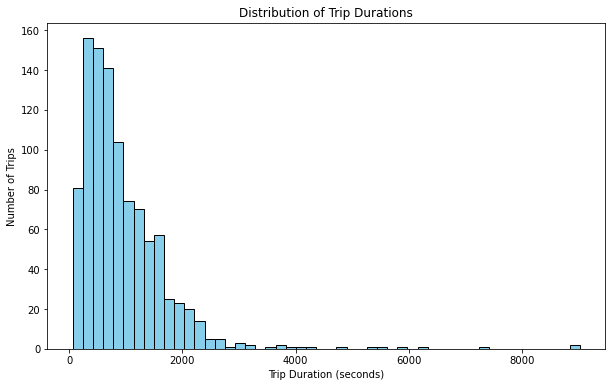

In [74]:
import matplotlib.pyplot as plt
# Plot a histogram of trip durations
plt.figure(figsize=(10, 6))
plt.hist(citibike_rides_subset['tripduration'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Durations')
plt.show()

B. Box Plot: Trip Duration by User Type

We use seaborn to create a box plot, which visually compares the distribution of trip durations for different user types (e.g., Subscriber, Customer). Box plots are useful for identifying potential outliers and comparing the spread of data across different groups.

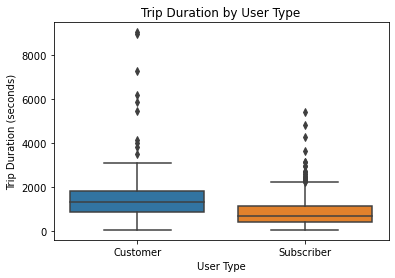

In [75]:
import seaborn as sns

# Create a box plot of trip duration by user type
sns.boxplot(x='usertype', y='tripduration', data=citibike_rides_subset)
plt.xlabel('User Type')
plt.ylabel('Trip Duration (seconds)')
plt.title('Trip Duration by User Type')
plt.show()

C. Simple Bar Chart: Distribution of User Types

This visualization will show the distribution of user types (Subscriber vs. Customer) in the dataset. Subscribers have an annual pass.

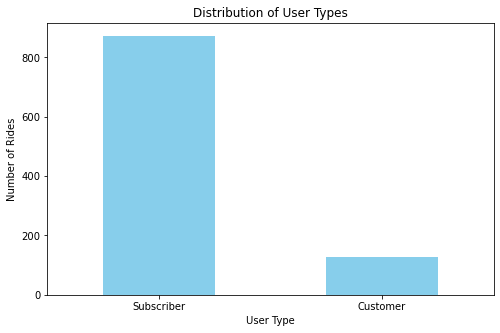

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each user type
user_type_counts = citibike_rides_subset['usertype'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 5))
user_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of User Types')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=360)
plt.show()

D. Scatter Plot with Age and Trip Duration

This visualization will explore the relationship between user age and trip duration.

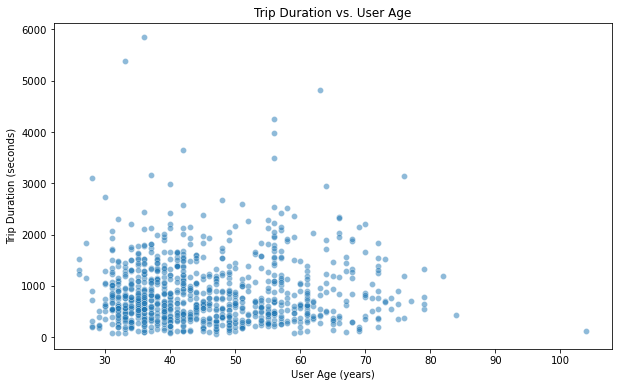

In [82]:
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='tripduration', data=citibike_rides_subset, alpha=0.5)
plt.title('Trip Duration vs. User Age')
plt.xlabel('User Age (years)')
plt.ylabel('Trip Duration (seconds)')
plt.show()

**2. In R, build a series of data visualizations, from simple to advanced.**

A. Simple Histogram: Distribution of Trip Durations

We build a simple histogram to visualize the distribution of trip durations in the dataset.

In [85]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

robjects.r('''
# Create a histogram of trip durations
hist(citibike_rides_selected$tripduration, 
     breaks = 50, 
     col = "skyblue", 
     border = "black", 
     xlab = "Trip Duration (seconds)", 
     ylab = "Number of Trips", 
     main = "Distribution of Trip Durations")

''') 

R object with classes: ('histogram',) mapped to:
<ListVector - Python:0x7f8998caf1c8 / R:0x7f8956cd9558>
[Float..., IntVe..., Float..., Float..., StrVe..., BoolV...]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f8998caf608 / R:0x7f895491f390>
[0.000000, 200.000000, 400.000000, 600.000000, ..., 8600.000000, 8800.000000, 9000.000000, 9200.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x7f8998afa048 / R:0x7f8957b354a0>
[55, 161, 169, 154, ..., 0, 0, 1, 1]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f8998afa708 / R:0x7f8957b35680>
[0.000275, 0.000805, 0.000845, 0.000770, ..., 0.000000, 0.000000, 0.000005, 0.000005]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x7f8998afa908 / R:0x7f8957b35d80>
[100.000000, 300.000000, 500.000000, 700.000000, ..., 8500.000000, 8700.000000, 8900.000000, 9100.000000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x7f8998afa508 / R:0x7f8956df40d0>
['citibike_rides_selected$tripduration']
  equidist: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x7f8998afaa08 / R:0x7f89b421b6e0>
[       1]

B. Simple Bar Chart: Distribution of User Types

This visualization will show the distribution of user types (Subscriber vs. Customer) in the dataset. Subscribers have an annual pass.

In [89]:
import rpy2.robjects as robjects

robjects.r('''
# Count the occurrences of each user type
user_type_counts <- table(citibike_rides_selected$usertype)

# Create the bar plot
barplot(user_type_counts, 
        main = "Distribution of User Types", 
        xlab = "User Type", 
        ylab = "Number of Rides", 
        col = "lightblue") 

''') 

0.700000,1.900000


Thanks for your attention and engagement today! You're welcome to connect with me on LinkedIn (please add a message to your connection request.)